In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Sample data generation
n = 1000  # Number of transactions
transaction_id = range(1, n + 1)
user_id = np.random.randint(1, 301, n)
transaction_date = pd.date_range(start='2023-01-01', periods=n, freq='H')
crypto_asset = np.random.choice(['BTC', 'ETH', 'LTC'], n)
transaction_type = np.random.choice(['Buy', 'Sell', 'Transfer'], n)
transaction_amount_usd = np.round(np.random.uniform(50, 5000, n), 2)
transaction_volume = transaction_amount_usd / np.random.uniform(1000, 60000, n)
user_registered_date = pd.date_range(start='2022-01-01', end='2023-01-01', periods=n)
referral = np.random.choice(['Yes', 'No'], n)

# DataFrame creation
df = pd.DataFrame({
    'TransactionID': transaction_id,
    'UserID': user_id,
    'TransactionDate': transaction_date,
    'CryptoAsset': crypto_asset,
    'TransactionType': transaction_type,
    'TransactionAmountUSD': transaction_amount_usd,
    'TransactionVolume': transaction_volume,
    'UserRegisteredDate': user_registered_date,
    'Referral': referral
})

df.head()

In [ ]:
# Load dataset
df = pd.read_csv(r"C:\Users\alipr\Downloads\Compressed\Tabdeal Task\sample_cyrpto_data.csv")

# Data Cleaning and Preparation
# Missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert date columns to datetime formats
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['UserRegisteredDate'] = pd.to_datetime(df['UserRegisteredDate'])

In [89]:
# Exploratory Data Analysis (EDA)
# Summary of key metrics
total_transaction_volume = df['TransactionVolume'].sum()
average_transaction_amount = df['TransactionAmountUSD'].mean()
most_active_trading_days = df['TransactionDate'].dt.day_name().value_counts().idxmax()

print("Total Transaction Volume:", total_transaction_volume)
print("Average Transaction Amount:", average_transaction_amount)
print("Most Active Trading Days:", most_active_trading_days)

# Analyze user activity patterns since their registration date
user_activity = df.groupby('UserID')['TransactionDate'].count()
user_activity.describe()

Total Transaction Volume: 181.30979680782937
Average Transaction Amount: 2509.18705
Most Active Trading Days: Sunday


count    285.000000
mean       3.508772
std        1.864445
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        9.000000
Name: TransactionDate, dtype: float64

In [30]:
# User Segmentation
# Segment users based on their trading activity and the cryptocurrencies they trade most frequently
user_segmentation = df.groupby(['UserID', 'CryptoAsset']).size().unstack(fill_value=0)

CryptoAsset,BTC,ETH,LTC
UserID,,,
1,2,3,3
2,0,1,2
3,1,0,0
4,3,0,1
5,3,0,4
...,...,...,...
296,1,3,0
297,0,1,0
298,0,0,1


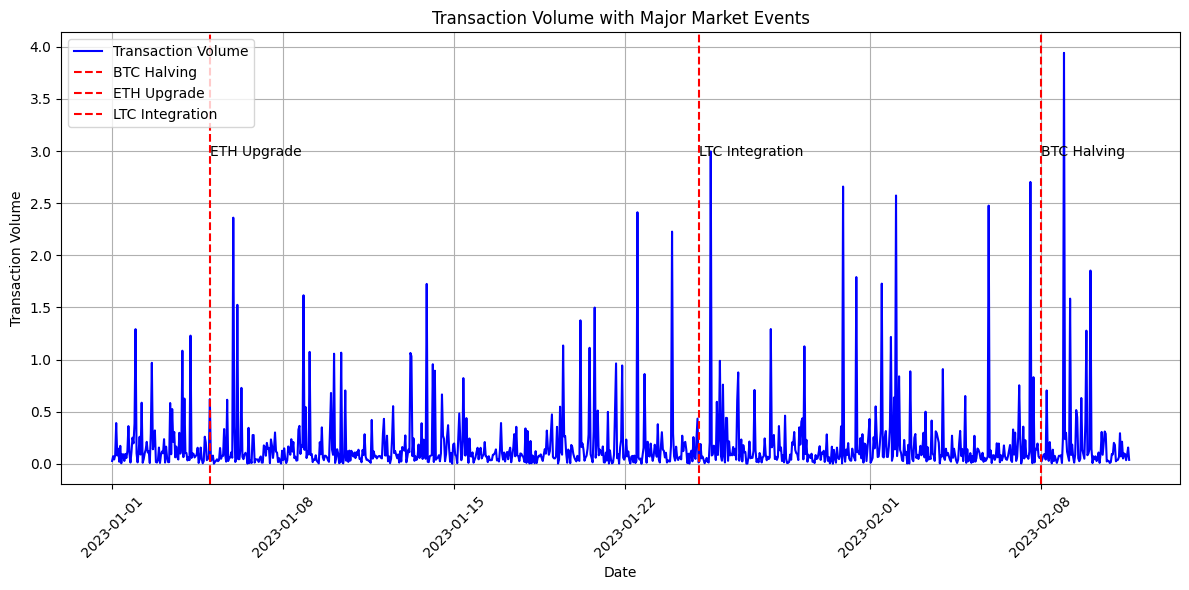

In [107]:
# Trend Analysis
# Identify trends in cryptocurrency transactions (buys vs. sells) over the month
transaction_trends = df.groupby(['TransactionType', 'CryptoAsset']).size().unstack(fill_value=0)
transaction_trends

# Correlate transaction volume trends with major market events
# Hypothetic DF fro events
market_events = pd.DataFrame({
    'Event': ['BTC Halving', 'ETH Upgrade', 'LTC Integration'],
    'Date': ['2023-02-08', '2023-01-05', '2023-01-25']
})

# dates to datetime
market_events['Date'] = pd.to_datetime(market_events['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['TransactionDate'], df['TransactionVolume'], color='blue', label='Transaction Volume')

# vertical lines for events
for _, event in market_events.iterrows():
    plt.axvline(x=event['Date'], color='red', linestyle='--', label=event['Event'])

    # display event names
    plt.text(event['Date'], df['TransactionVolume'].max() * 0.75, event['Event'], rotation=0)

plt.title('Transaction Volume with Major Market Events')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary of Analysis:

1. Total Transaction Volume: 181.30979680782937
2. Average Transaction Amount: 2509.18705
3. Number of Transaction per User: 3.508771929824561
4. User Engagement Rate: 100.0
5. Retention Rate: 0.1
6. Referral Conversion Rate: 84.21052631578947


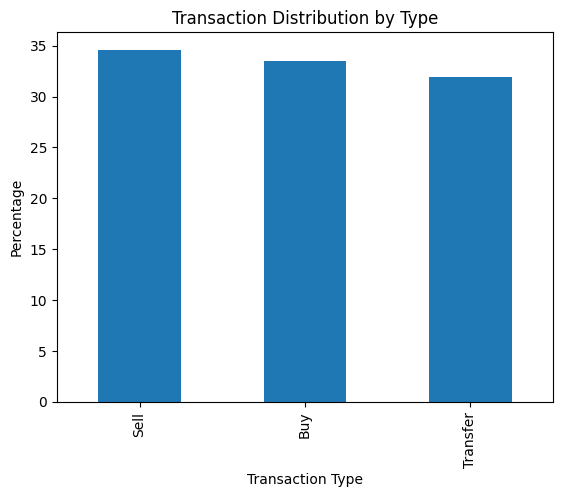

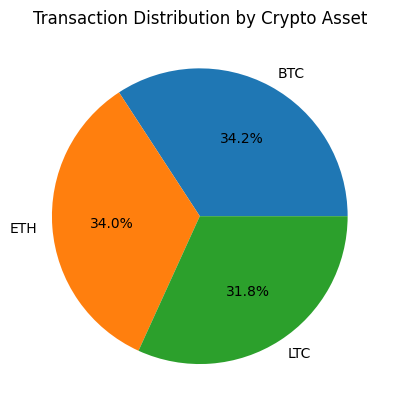


7. Average Transaction Volume per Crypto Asset:
CryptoAsset
BTC    0.176377
ETH    0.166564
LTC    0.202382
Name: TransactionVolume, dtype: float64

8. Active Users Count:
UserID
99     9
39     8
1      8
233    8
63     8
      ..
74     1
88     1
91     1
80     1
32     1
Name: count, Length: 285, dtype: int64

9. High-Value Users:
UserID
233    32548.99
99     26529.79
53     24788.43
111    24785.36
1      24364.39
253    23598.38
170    23074.86
294    22743.12
104    20764.25
39     20731.73
Name: TransactionAmountUSD, dtype: float64

10. Segmentation by Crypto Asset Preference:
UserID  CryptoAsset
1       ETH            3
        LTC            3
        BTC            2
2       LTC            2
        ETH            1
                      ..
298     LTC            1
299     BTC            1
        LTC            1
300     BTC            1
        LTC            1
Name: count, Length: 602, dtype: int64

11. Segmentation by Registration Date:
UserRegisteredDate
2022-01    

In [90]:
# Additional Insights and Metrics from this Data
# Total Transaction Volume
total_transaction_volume = df['TransactionVolume'].sum()

# Average Transaction Amount
average_transaction_amount = df['TransactionAmountUSD'].mean()

# Number of Transaction / User
transaction_per_user = df.groupby('UserID')['TransactionID'].count().mean()

# User Engagement Rate
active_users = df['UserID'].nunique()
total_users = df['UserID'].nunique()
user_engagement_rate = (active_users / total_users) * 100

# Retention Rate
initial_users = len(df['UserRegisteredDate'].unique())
final_users = len(df[df['TransactionDate'] == max(df['TransactionDate'])]['UserID'].unique())
retention_rate = (final_users / initial_users) * 100

# Referral Conversion Rate
referral_conversion_rate = (df[df['Referral'] == 'Yes']['UserID'].nunique() / total_users) * 100

# Transaction Distribution by Type
transaction_distribution_type = df['TransactionType'].value_counts(normalize=True) * 100

# Transaction Distribution by Crypto Asset
transaction_distribution_asset = df['CryptoAsset'].value_counts(normalize=True) * 100

# Average Transaction Volume per Crypto Asset
avg_transaction_volume_per_asset = df.groupby('CryptoAsset')['TransactionVolume'].mean()

# Active vs. Inactive Users
active_users_count = df['UserID'].value_counts()

# High-Value vs. Low-Value Users
high_value_users = df.groupby('UserID')['TransactionAmountUSD'].sum().nlargest(10)

# Segmentation by Crypto Asset Preference
crypto_asset_preference = df.groupby('UserID')['CryptoAsset'].value_counts()

# Segmentation by Registration Date
registration_date_segmentation = df.groupby(df['UserRegisteredDate'].dt.to_period("M")).size()

# Calculate the time between registration and first transaction for each user
df['TimeToFirstTransaction'] = df.groupby('UserID')['TransactionDate'].transform('min') - df['UserRegisteredDate']
time_to_first_transaction_stats = df['TimeToFirstTransaction'].describe()

# Identify users who have not transacted for a time of period
last_transaction_date = df['TransactionDate'].max()
inactive_users = df[df['TransactionDate'] < last_transaction_date - pd.Timedelta(days=30)]['UserID'].unique()
churn_rate = len(inactive_users) / total_users

# Analyze peak transaction times
peak_transaction_hours = df['TransactionDate'].dt.hour.value_counts().nlargest(3)

# Calculate the conversion rate of users who joined with referral and actively transact
referral_conversion_rate = (df[df['Referral'] == 'Yes']['UserID'].nunique() / total_users) * 100

print("Summary of Analysis:\n")
print("1. Total Transaction Volume:", total_transaction_volume)
print("2. Average Transaction Amount:", average_transaction_amount)
print("3. Number of Transaction per User:", transaction_per_user)
print("4. User Engagement Rate:", user_engagement_rate)
print("5. Retention Rate:", retention_rate)
print("6. Referral Conversion Rate:", referral_conversion_rate)

# Transaction Distribution by Type
transaction_distribution_type.plot(kind='bar', title='Transaction Distribution by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.show()

# Plotting Transaction Distribution by Crypto Asset
transaction_distribution_asset.plot(kind='pie', title='Transaction Distribution by Crypto Asset', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

print("\n7. Average Transaction Volume per Crypto Asset:")
print(avg_transaction_volume_per_asset)

print("\n8. Active Users Count:")
print(active_users_count)

print("\n9. High-Value Users:")
print(high_value_users)

print("\n10. Segmentation by Crypto Asset Preference:")
print(crypto_asset_preference)

print("\n11. Segmentation by Registration Date:")
print(registration_date_segmentation)

print("\n12. Time to First Transaction Statistics:")
print(time_to_first_transaction_stats)

print("\n13. Churn Rate:", churn_rate)

print("\n14. Peak Transaction Hours:")
print(peak_transaction_hours)

print("\n15. Referral Conversion Rate:", referral_conversion_rate)

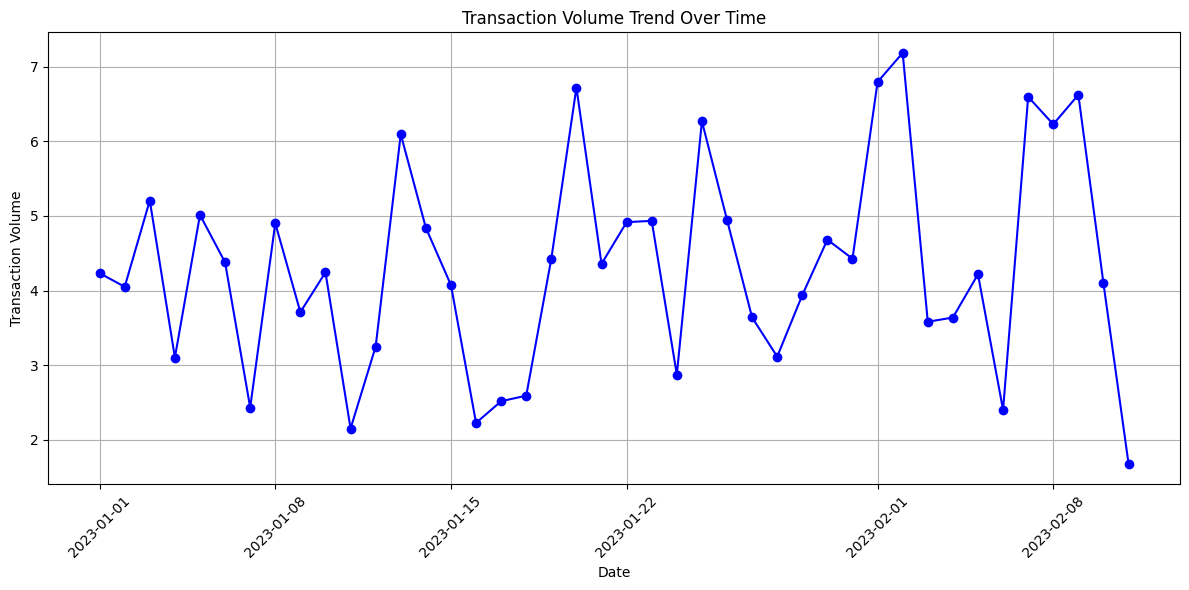

In [73]:
# Group transaction volume by date
transaction_volume_trend = df.groupby(df['TransactionDate'].dt.date)['TransactionVolume'].sum()

plt.figure(figsize=(12, 6))
plt.plot(transaction_volume_trend.index, transaction_volume_trend.values, color='blue', marker='o', linestyle='-')
plt.title('Transaction Volume Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

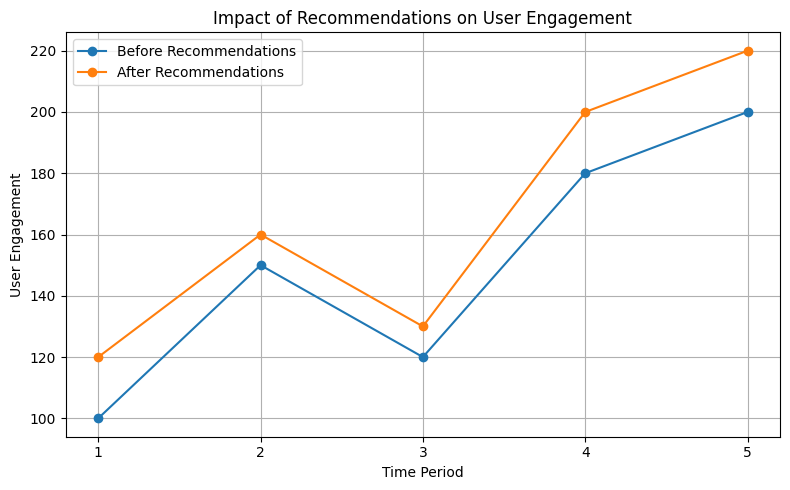

In [86]:
import matplotlib.pyplot as plt

# Hypothetic data for user engagement before and after recommendations
engagement_before_recommendations = [100, 150, 120, 180, 200]  # User engagement before recommendations
engagement_after_recommendations = [120, 160, 130, 200, 220]    # User engagement after recommendations

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(engagement_before_recommendations) + 1), engagement_before_recommendations, label='Before Recommendations', marker='o')
plt.plot(range(1, len(engagement_after_recommendations) + 1), engagement_after_recommendations, label='After Recommendations', marker='o')
plt.title('Impact of Recommendations on User Engagement')
plt.xlabel('Time Period')
plt.ylabel('User Engagement')
plt.xticks(range(1, len(engagement_before_recommendations) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()